In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code - the exact arguments of make_blobs() are not important
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers = blob_centers, cluster_std = blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters = k, n_init=10, random_state=42)       # n_init bashlama sayidi. 10 defe ferqli qiymetlerle bashlayacaq.
y_pred = kmeans.fit_predict(X)


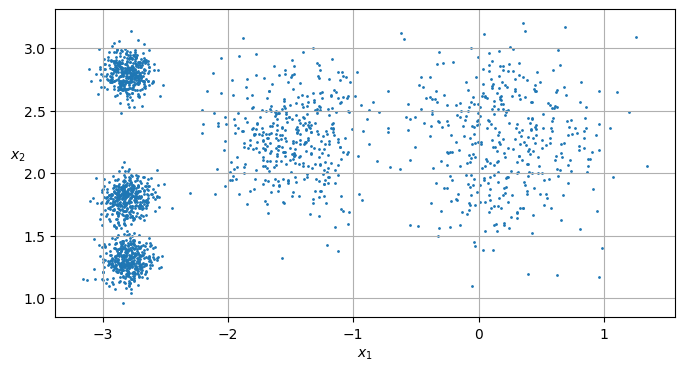

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.grid()
plt.show();

In [ ]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [ ]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_    # koordinatlaridi

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [ ]:
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

In [ ]:
X_new.shape, X.shape   # 2 - 2

((4, 2), (2000, 2))

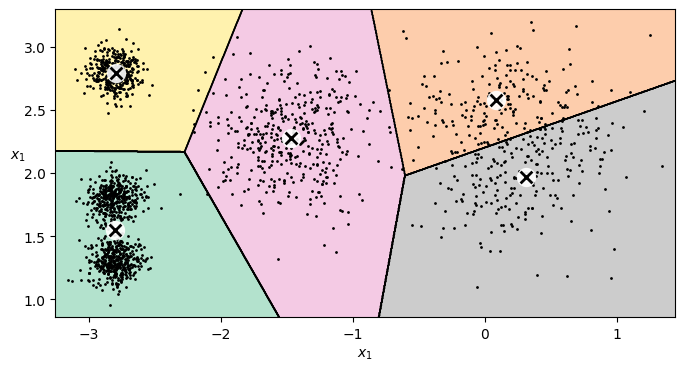

In [ ]:
def plot_data(X):
   plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)

   if show_xlabels:
       plt.xlabel("$x_1$")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("$x_1$", rotation=0)
   else:
       plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
kmeans.transform(X_new).round(2)    # yeni yaratdigimiz datasetin her bir klaster merkezinden mesafesine baxir

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

In [ ]:
good_init = np.array([[-3, 3], [-3, -2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3, -2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

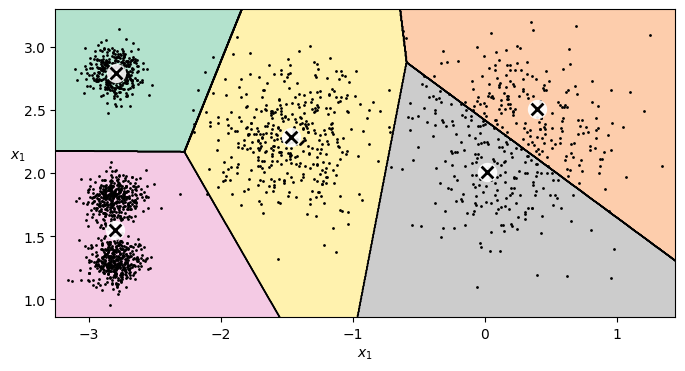

In [ ]:
plt.figure(figsize=[8, 4])
plot_decision_boundaries(kmeans, X)

In [ ]:
kmeans.inertia_

223.2921606917702

In [ ]:
kmeans.score(X)

-223.29216069177022

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init='random', n_init=10,
                             random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

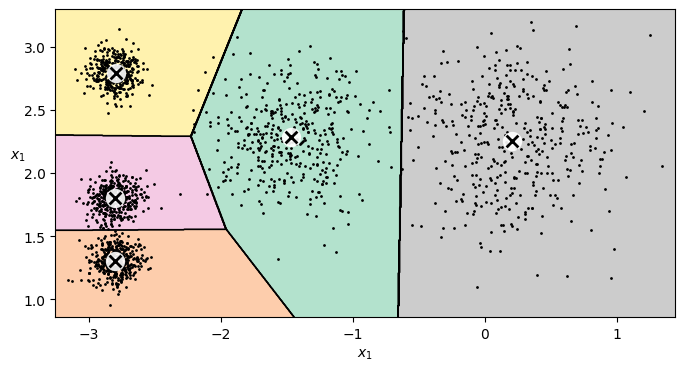

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [ ]:
kmeans_rnd_10_inits.inertia_

211.59853725816828

formalar oval kimi olanda k-means yaxsi netice vermir

#Mini-Batch K-Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [ ]:
#yaxsi terefleri ondandi ki daha az data uzerinde isleyir, amma bu accuricini biraz ashagi salir. cox daha suretlidi

In [ ]:
minibatch_kmeans.inertia_

211.65899374574317

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state = 42)
#plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k-3$", '$k-8$)
plt.show()

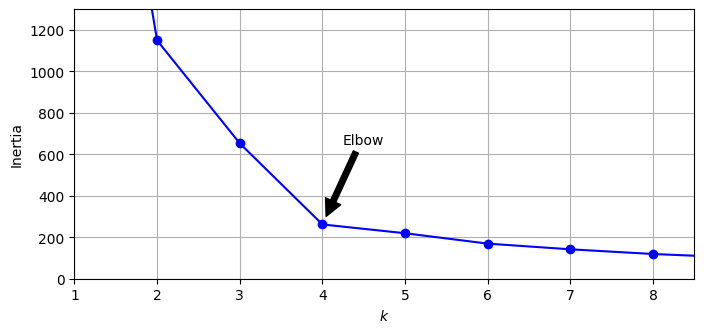

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment='center')
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

#Limits of K-Means

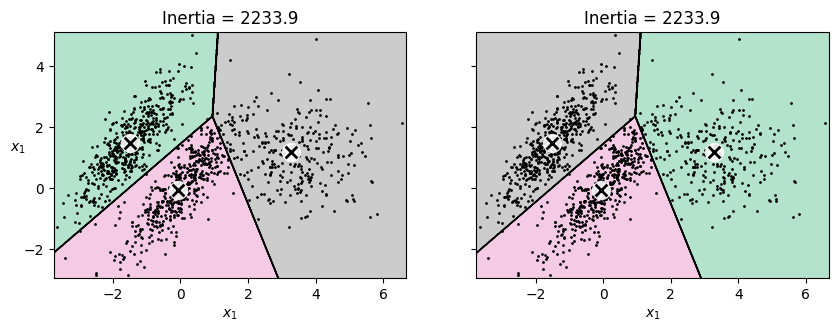

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4),(0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.347, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]             # r_ --> arraylari concat edir

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

plt.show()

In [ ]:
import PIL

image = np.asarray(PIL.Image.open("/content/WhatsApp Image 2025-06-20 at 19.37.06.jpeg"))
image.shape

(533, 800, 3)

array([[[ 25,  29,   2],
        [ 24,  28,   1],
        [ 25,  28,   1],
        ...,
        [ 57, 105,  19],
        [ 56, 103,  22],
        [ 52,  99,  18]],

       [[ 24,  28,   1],
        [ 23,  27,   0],
        [ 24,  27,   0],
        ...,
        [ 60, 108,  22],
        [ 59, 107,  23],
        [ 55, 102,  21]],

       [[ 22,  26,   1],
        [ 22,  26,   1],
        [ 22,  26,   1],
        ...,
        [ 66, 114,  28],
        [ 63, 111,  27],
        [ 58, 105,  24]],

       ...,

       [[ 15,  19,   2],
        [ 15,  19,   2],
        [ 12,  19,   1],
        ...,
        [ 13,  63,   4],
        [  9,  56,   2],
        [  5,  52,   0]],

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 12,  19,   1],
        ...,
        [ 11,  61,   2],
        [  7,  54,   0],
        [  3,  50,   0]],

       [[ 13,  17,   0],
        [ 13,  17,   0],
        [ 11,  18,   0],
        ...,
        [  9,  59,   0],
        [  5,  52,   0],
        [  2,  49,   0]]], dtype=uint8)
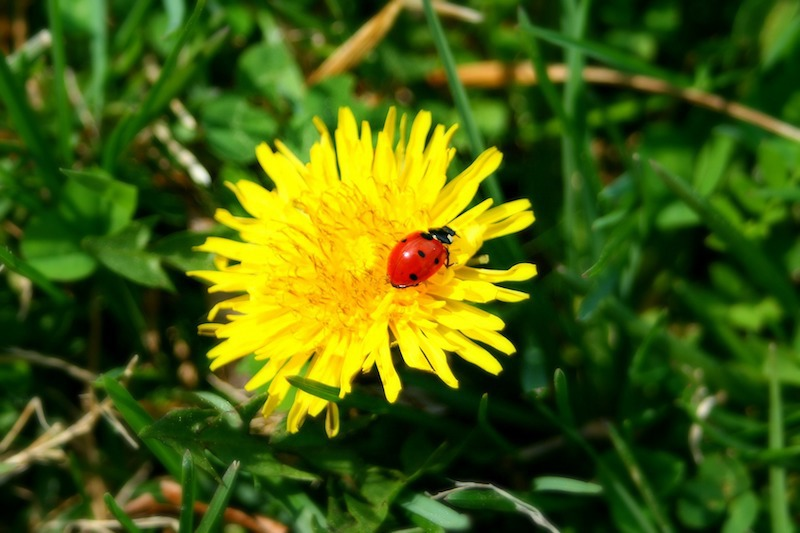

In [ ]:
image

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape).astype('uint8')

In [ ]:
X

array([[25, 29,  2],
       [24, 28,  1],
       [25, 28,  1],
       ...,
       [ 9, 59,  0],
       [ 5, 52,  0],
       [ 2, 49,  0]], dtype=uint8)

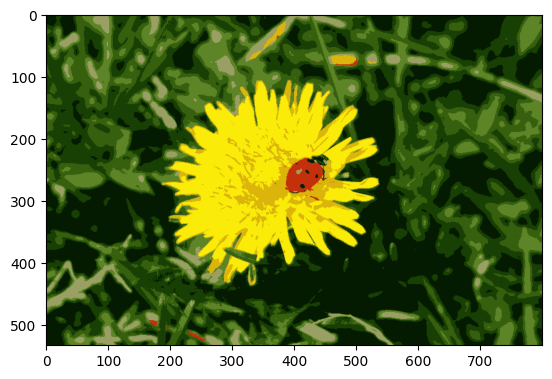

In [ ]:
plt.imshow(segmented_img)

array([[[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [54, 96, 14],
        [54, 96, 14],
        [54, 96, 14]],

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [54, 96, 14],
        [54, 96, 14],
        [54, 96, 14]],

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [54, 96, 14],
        [54, 96, 14],
        [54, 96, 14]],

       ...,

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [24, 63,  4],
        [24, 63,  4],
        [24, 63,  4]],

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [24, 63,  4],
        [24, 63,  4],
        [ 5, 27,  1]],

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [24, 63,  4],
        [24, 63,  4],
        [ 5, 27,  1]]], dtype=uint8)
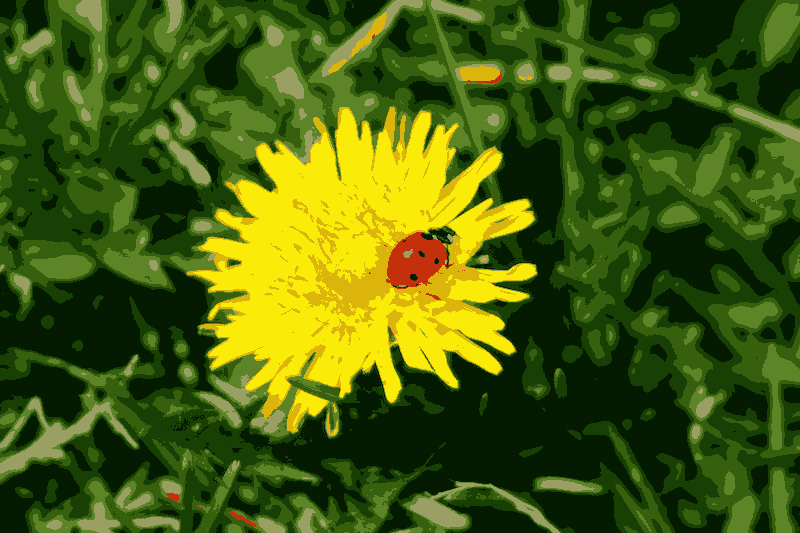

In [ ]:
segmented_img

In [ ]:
kmeans.cluster_centers_

array([[  5.62656014,  27.62827035,   1.43097387],
       [250.18332185, 236.61849586,   8.12416006],
       [ 54.47376156,  96.98158662,  14.30173583],
       [ 93.67907561, 132.36844055,  39.17802609],
       [154.44606221, 160.6939414 ,  99.37145779],
       [219.29723388, 180.786367  ,  12.56254631],
       [ 24.48565973,  63.3244958 ,   4.16214845],
       [195.83295019,  48.20881226,  11.59003831]])

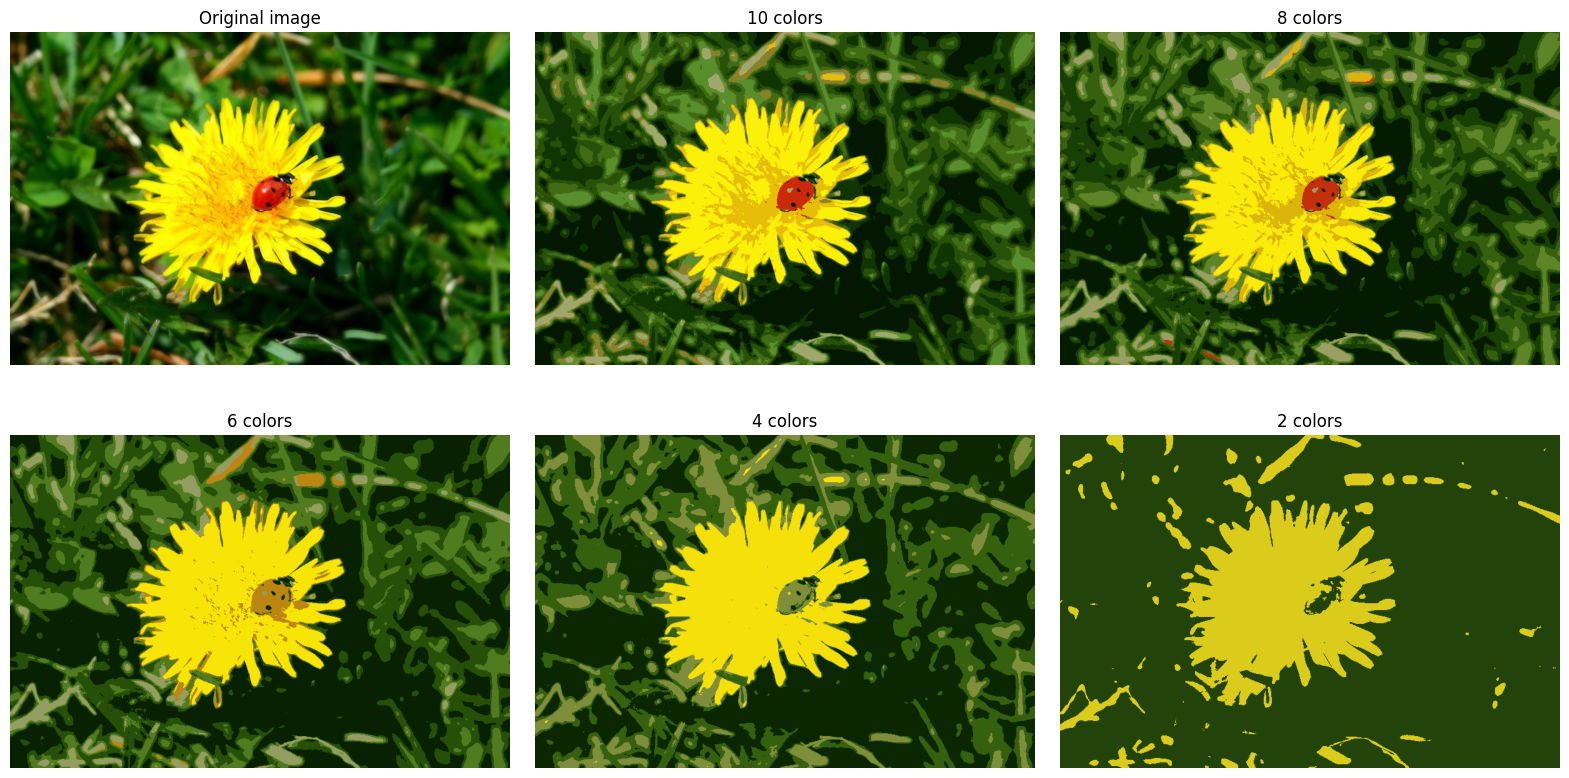

In [ ]:
segmented_imgs = []

n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.05, hspace=0.1)



plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
  plt.subplot(2, 3, 2 + idx)
  plt.imshow(segmented_imgs[idx] / 255)
  plt.title(f"{n_clusters} colors")
  plt.axis('off')

plt.show()

# Using Clustering for Semi-Supervised Learning

Another use case for clustering is semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [ ]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)           # fit edende mesafeleri yoxlayir
representative_digit_idx = X_digits_dist.argmin(axis=0) # en az mesafe olan 50 merkeze yaxin noqteni gosterir
X_representative_digits = X_train[representative_digit_idx]

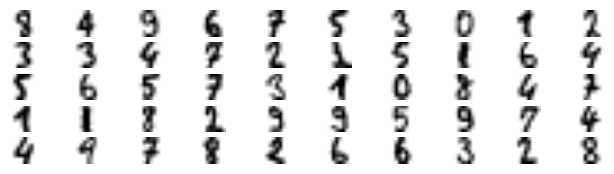

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k // 10, 10, index + 1)
  plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
             interpolation='bilinear')
  plt.axis('off')

plt.show()

In [ ]:
X_representative_digit.reshape(8, 8).shape

(8, 8)

In [ ]:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.06801007556675064

In [ ]:
log_reg.score(X_train, y_train)

0.11285714285714285

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:
y_representative_digits

array([1, 3, 6, 0, 7, 9, 2, 4, 8, 9, 5, 4, 7, 1, 2, 6, 1, 2, 5, 1, 4, 1,
       3, 3, 8, 8, 2, 5, 6, 9, 1, 4, 0, 6, 8, 3, 4, 6, 7, 2, 4, 1, 0, 7,
       5, 1, 9, 9, 3, 7])

In [ ]:
y_train_propagated

array([4, 4, 5, ..., 4, 4, 3])

In [ ]:
kmeans.labels_

array([ 7, 31, 44, ..., 40, 40, 23], dtype=int32)

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.07808564231738035

In [ ]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.07808564231738035

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

np.float64(0.09481481481481481)

np.percentile is good to find anomalities

#DBSCAN

Density based

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

eps boyuk olanda daha genish etrafa baxir

min_samples o demekdi ki, bir datanin etrafinda en az neche noqte olsa onu merkez kimi goturur ve DBSCAN boyuk olchulu datalarda effektiv deyil

In [ ]:
dbscan.labels_[:10]         # -1 ler anomality lerdi

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]          # indexlerdi, amma burda anomalities yoxdu

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_                        # indices-in hansi kordinatlarda yerleshdiyi gorunur

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

# Gaussian Mixtures

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
gm.weights_         # her bir merkez noqtesine gore dushme ehtimalidi

array([0.40005972, 0.20961444, 0.39032584])

In [ ]:
gm.means_           # merkezlerin koordinatidi

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [ ]:
gm.covariances_     # yayilma     σ

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [ ]:
gm.n_iter_      # neche defe run olub

4

In [ ]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(X).round(3)        # neche faiz dushunursenki hemin merkeze aiddi

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

Active learning - En ehemiyyetli oldugunu dushunduyumuz datalari labelleyirik

meselen modelin en az emin oldugu instancelar uzeridnde labeling ede bilerik en pis oldugu klass uzre labeling ede bilerik

In [ ]:
X_new, y_new = gm.sample(6)         # sintetik (suni) data yaradir

X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [ ]:
y_new

array([0, 0, 1, 1, 1, 2])

# Hands-On Projects

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
X, y = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=42)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=40)

In [ ]:
train_idx, test_idx = next(sss.split(X, y))

generator yazisi gelende next istifade et genelde duzelir

In [ ]:
train_idx, test_idx

(array([232,  52, 399, 325,  83,  85, 171, 219, 176,  32, 184, 316, 203,
        257,  28, 139, 279, 317, 247,  37, 315, 251, 350, 353, 209, 223,
        116, 253, 309, 217,  67, 173, 108, 122,  60, 130,  63,  36, 147,
        351, 311,  81, 295, 117,  19, 119, 292,  13, 229, 227,  61,  62,
        194, 392, 198, 204, 150,  90, 168,  15, 157, 161, 174, 346, 220,
        364, 339, 327,  76, 107, 236, 213, 178, 365,  58,  42, 212, 298,
         73, 395, 283, 267, 313, 131, 291,  68, 319, 297,  20,  48, 146,
        274, 285, 338, 301, 289, 337, 132, 136, 231, 394, 224, 166,  47,
        123, 170, 225, 188, 360, 106,  74,  94, 330, 354, 182, 323, 115,
        177, 167, 243,  59, 380,  14,  71, 179, 246, 196, 371, 142, 190,
         89, 368,  93,  55,  80,  84, 248, 393, 299, 205, 284, 103, 186,
        159, 206,   0, 169, 100, 398, 306, 113, 358, 237, 199,  34, 379,
         40, 210,  79,  98,  43, 118,  78, 193, 255, 321, 382, 211, 391,
         49, 377,  23, 152, 105, 386,  44, 140, 265

In [ ]:
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, random_state=43, test_size=80)

In [ ]:
train_idx, validation_idx = next(sss.split(X_train, y_train))

In [ ]:
X_train_new, y_train_new = X_train[train_idx], y_train[train_idx]
X_validation, y_validation = X_train[validation_idx], y_train[validation_idx]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.99, random_state=42)

In [ ]:
X_train_new_transformed = pca.fit_transform(X_train_new)

In [ ]:
X_validation_new_transformed, X_test_transformed = pca.transform(X_validation),  pca.transform(X_test)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sil_scores = [KMeans(n_clusters=i, random_state=42).fit(X_train) for i in range(20, 200, 5)]

In [ ]:
scores_total = [silhouette_score(X, model.predict(X)) for model in sil_scores]

In [ ]:
scores_total

[np.float32(0.09499594),
 np.float32(0.10914835),
 np.float32(0.121061),
 np.float32(0.13931203),
 np.float32(0.14061514),
 np.float32(0.14527144),
 np.float32(0.1522973),
 np.float32(0.16451842),
 np.float32(0.16499497),
 np.float32(0.15996352),
 np.float32(0.1708932),
 np.float32(0.17515713),
 np.float32(0.1802945),
 np.float32(0.1837766),
 np.float32(0.18436791),
 np.float32(0.18847422),
 np.float32(0.19096005),
 np.float32(0.19382355),
 np.float32(0.19369018),
 np.float32(0.19562846),
 np.float32(0.19605461),
 np.float32(0.19414559),
 np.float32(0.19209343),
 np.float32(0.191708),
 np.float32(0.19085912),
 np.float32(0.19215935),
 np.float32(0.19076489),
 np.float32(0.19139363),
 np.float32(0.18897027),
 np.float32(0.18780434),
 np.float32(0.18765941),
 np.float32(0.18924552),
 np.float32(0.18890586),
 np.float32(0.18612692),
 np.float32(0.182576),
 np.float32(0.18180119)]

In [ ]:
import numpy as np
np.argmax(scores_total)

In [ ]:
best_model = sil_scores[np.argmax(scores_total)]

In [ ]:
sil_scores[np.argmax(scores_total)]

silhouette score bize daha yaxshi netice vere biler

In [ ]:
trained_model = best_model.fit(X)

In [ ]:
trained_model.inertia_

In [1]:
# plt.imshow(X_train.reshape(64, 64))

In [ ]:
for image in X_train:
  plt.imshow(image.reshape(64, 64), cmap='gray')

In [ ]:
def plot_faces(faces, labels, n_cols=5):
  faces = faces.reshape(-1, 64, 64)
  n_rows = (len(faces) - 1) // n_cols + 1
  plt.figure(figsize=(n_cols, n_rows * 1.1))
  for index, (face, label) in enumerate(zip(faces, labels)):
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(face, cmap='gray')
    plt.axis('off')
    plt.title(label)
  plt.show()

for cluster_id in np.unique(best_model.labels_):
  print("Cluster", cluster_id)
  in_cluster = best_model.labels_==cluster_id
  faces = X[in_cluster]
  labels = y[in_cluster]
  plot_faces(faces, labels)

In [ ]:
y_train_new.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(X_train_new_transformed, y_train_new)

In [ ]:
clf.score(X_train_new_transformed, y_train_new)

In [ ]:
clf.score(X_validation_new_transformed, y_validation)

In [ ]:
kmeans = KMeans(random_state=42)
distance = kmeans.fit_transform(X_train_new_transformed)

In [ ]:
distance_train = kmeans.fit_transform(X_train_new_transformed)
distance_valid = kmeans.transform(X_validation_new_transformed)
distance_test = kmeans.transform(X_test_transformed)

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(distance_train, y_train_new)

In [ ]:
rf_clf.score(distance_train, y_train_new)

In [ ]:
 rf_clf.score(distance_valid, y_validation)

In [ ]:
rf_clf.score(distance_test, y_test)

In [ ]:
data_with_distance_train = np.concatenate((X_train_new_transformed, distance_train), axis=1)
data_pca = PCA(0.99)

In [ ]:
data_with_distance_pca_train = data_pca.fit_transform(data_with_distance_train)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(data_with_distance_pca_train, y_train_new)
clf.score(data_with_distance_pca_train, y_train_new)

# Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(random_state=42)

In [ ]:
gm.fit(data_with_distance_pca)

In [ ]:
new_samples = gm.sample(np.all(data_with_distance_pca))